In [293]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func
from sqlalchemy import or_
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [97]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [98]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [100]:
m = Base.classes.measurement
s = Base.classes.station

In [101]:
session = Session(engine)

In [284]:
start = "2017-01-10"
end = "2017-01-20"
qry = session.query(*[m.date,m.prcp]).filter(m.date <= '2017-01-09').\
        filter(m.date >= '2016-01-01').all()
i = pd.DataFrame(qry)
r = pd.DataFrame(qry)
n = r.set_index("date", inplace = True)
qry

[('2016-01-01', 0.0),
 ('2016-01-02', 0.0),
 ('2016-01-03', 0.0),
 ('2016-01-04', 0.0),
 ('2016-01-05', 0.0),
 ('2016-01-06', 0.0),
 ('2016-01-07', 0.18),
 ('2016-01-08', 0.01),
 ('2016-01-09', 0.03),
 ('2016-01-10', 0.01),
 ('2016-01-11', 0.0),
 ('2016-01-12', 0.0),
 ('2016-01-13', 0.0),
 ('2016-01-14', 0.0),
 ('2016-01-15', 0.0),
 ('2016-01-16', 0.01),
 ('2016-01-17', 0.0),
 ('2016-01-18', 0.0),
 ('2016-01-19', 0.0),
 ('2016-01-20', 0.0),
 ('2016-01-21', 0.0),
 ('2016-01-22', 0.0),
 ('2016-01-23', 0.0),
 ('2016-01-24', 0.0),
 ('2016-01-25', 0.04),
 ('2016-01-26', 0.16),
 ('2016-01-27', 0.01),
 ('2016-01-28', 0.0),
 ('2016-01-29', 0.0),
 ('2016-01-30', 0.0),
 ('2016-01-31', 0.0),
 ('2016-02-01', 0.0),
 ('2016-02-02', 0.06),
 ('2016-02-03', 0.0),
 ('2016-02-04', 0.0),
 ('2016-02-05', 0.0),
 ('2016-02-06', 0.0),
 ('2016-02-07', 0.02),
 ('2016-02-08', 0.01),
 ('2016-02-09', 0.0),
 ('2016-02-10', 0.0),
 ('2016-02-11', 0.0),
 ('2016-02-12', 0.02),
 ('2016-02-13', 0.0),
 ('2016-02-14', 0.0)

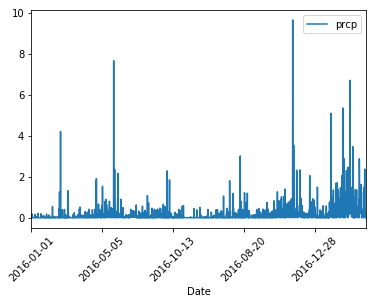

In [277]:
r.plot()
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.show()

In [179]:
r.describe()

,prcp
count,2363.000000
mean,0.158493
std,0.477564
min,0.000000
25%,0.000000
50%,0.010000
75%,0.120000
max,9.640000


In [182]:
session.query(func.count(s.station)).scalar()

9

In [288]:
session.query(*[m.station, func.count(m.station)]).group_by(m.station).order_by(func.count(m.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [297]:
start = "2016-01-10"
end = "2017-01-10"

tt = session.query(*[m.date, m.tobs]).\
        filter(m.date <= end).\
        filter(m.date >= start).\
        filter(or_(m.station == 'USC00519281')).\
        all()
tt

[('2016-01-10', 74),
 ('2016-01-11', 73),
 ('2016-01-12', 75),
 ('2016-01-13', 74),
 ('2016-01-14', 66),
 ('2016-01-15', 71),
 ('2016-01-16', 73),
 ('2016-01-17', 75),
 ('2016-01-18', 63),
 ('2016-01-19', 61),
 ('2016-01-20', 62),
 ('2016-01-21', 65),
 ('2016-01-22', 65),
 ('2016-01-23', 75),
 ('2016-01-24', 78),
 ('2016-01-25', 69),
 ('2016-01-26', 65),
 ('2016-01-27', 69),
 ('2016-01-28', 64),
 ('2016-01-29', 68),
 ('2016-01-30', 73),
 ('2016-01-31', 74),
 ('2016-02-01', 69),
 ('2016-02-02', 68),
 ('2016-02-03', 69),
 ('2016-02-04', 65),
 ('2016-02-05', 67),
 ('2016-02-06', 69),
 ('2016-02-07', 70),
 ('2016-02-08', 56),
 ('2016-02-09', 57),
 ('2016-02-10', 58),
 ('2016-02-11', 61),
 ('2016-02-12', 71),
 ('2016-02-13', 74),
 ('2016-02-14', 71),
 ('2016-02-15', 75),
 ('2016-02-16', 72),
 ('2016-02-17', 71),
 ('2016-02-18', 72),
 ('2016-02-19', 69),
 ('2016-02-20', 71),
 ('2016-02-21', 72),
 ('2016-02-22', 60),
 ('2016-02-23', 69),
 ('2016-02-24', 67),
 ('2016-02-25', 64),
 ('2016-02-26

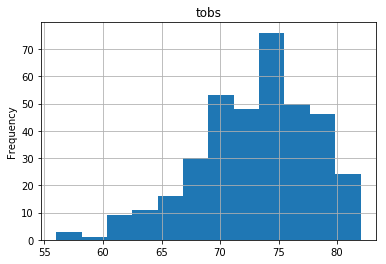

In [290]:
dt = pd.DataFrame(tt)
plt.clf()
dt.hist(bins = 12)
plt.ylabel("Frequency")
plt.show()

In [241]:
def calc_temps(start, end):
    min_t = session.query(func.min(m.tobs)).\
        filter(m.date <= end).\
        filter(m.date >= start).\
        scalar()
    max_t = session.query(func.max(m.tobs)).\
        filter(m.date <= end).\
        filter(m.date >= start).\
        scalar()
    mean_t = session.query(func.avg(m.tobs)).\
        filter(m.date <= end).\
        filter(m.date >= start).\
        scalar()
    return {"min": min_t,
            "max": max_t,
            "mean": mean_t}

In [243]:
sam = calc_temps("2016-01-10", "2016-01-20")
sam

{'max': 77, 'mean': 68.46875, 'min': 61}

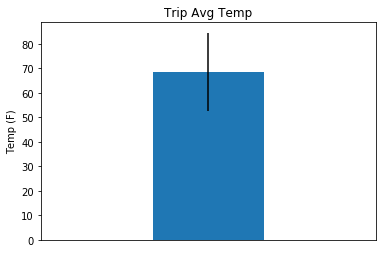

In [280]:
sss = plt.bar(1, width = .1, height = sam['mean'], yerr = int(sam['max'])-int(sam['min']))
plt.xlim(.85,1.15)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')
plt.ylabel("Temp (F)")
plt.title("Trip Avg Temp")
plt.show()

In [307]:
start = "2012-01-10"
end = "2013-01-16"

aa = session.query(*[m.station,func.sum(m.prcp)]).\
        filter(m.date <= end).\
        filter(m.date >= start).\
        group_by(m.station).\
        all()
aa

[('USC00511918', 9.879999999999994),
 ('USC00513117', 34.779999999999994),
 ('USC00514830', 16.339999999999996),
 ('USC00516128', 142.05000000000004),
 ('USC00517948', 2.26),
 ('USC00518838', 9.489999999999997),
 ('USC00519281', 58.660000000000004),
 ('USC00519397', 15.239999999999974),
 ('USC00519523', 30.48000000000004)]

In [320]:
def daily_normals(d):
    min_t = session.query(func.min(m.tobs)).\
        filter(m.date.like("%"+d)).\
        scalar()
    max_t = session.query(func.max(m.tobs)).\
        filter(m.date.like("%"+d)).\
        scalar()
    mean_t = session.query(func.avg(m.tobs)).\
        filter(m.date.like("%"+d)).\
        scalar()
    return {"min": min_t,
            "max": max_t,
            "mean": mean_t}

In [325]:
trip = ["12-01", "12-02", "12-03","12-04", "12-05"]
emp = []
for e in trip:
    emp.append(daily_normals(e))
    print(daily_normals(e))
    

{'min': 65, 'max': 78, 'mean': 71.91666666666667}
{'min': 62, 'max': 77, 'mean': 71.32692307692308}
{'min': 67, 'max': 79, 'mean': 72.88679245283019}
{'min': 66, 'max': 81, 'mean': 72.17647058823529}
{'min': 64, 'max': 78, 'mean': 70.92156862745098}


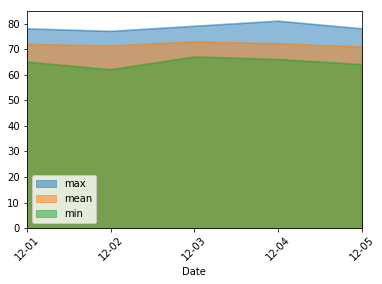

In [331]:
re = pd.DataFrame(emp)
plt.clf()
re.plot.area(stacked = False)
plt.xticks(np.arange(len(trip)), trip, rotation = 45)
plt.xlabel("Date")
plt.show()